### Implementation details

For solving this environment we have used the Multi-Agent Deep Deterministic Policy Gradient Algorithm (MADDPG).
MADDPG is similar to DDPG, however here we will have more than one agent in the same environment. Each agent will have its own actor and critic network. 

During training, the critic for each agent uses extra information like states observed by all agents (or full observation) and actions taken by all the other agents. Each actor has access to only its agent's observation and actions. During execution time, only the actors are present.

The actor and critic loss functions remain same as in DDPG. The actor tries to maximise the expected return, while the critic tries to reduce the expected Q-value of the current state, as set by the Target network, compared to what the local network is computing for that (state, action) pair.

In our implementation we have tested with both an MADDPG and a normal DDPG model.

In a normal DDPG model, both the agents share a common actor and critic network. For each agent, it seems like it is performing 
self-play with the ball. It is not aware of the other agent's existence in the environment. Although we received a higher training score in the normal DDPG model compared to the MADDPG model, the environment will be more dynamic in this case as 
each agent is trying to learn in the same environment while being unaware of each other's presence. 

In the MADDPG model, both agents have their own set of actor and critic networks. The critic networks take a full observation as input which is just a concatenation of the observations of the 2 agents. The critic also takes the actions of both the agents as input. In this way, the critics are aware of the complete environment and learn quite well. If the critics are good, then their feedbacks to the actor networks (in the form of the loss function) will also be more accurate, and thus the agents will also learn better. 

### Learning Algorithm

We have used MADDPG and DDPG Algorithms for training the agents. 
Within DDPG, we have used concepts like Replay buffer, Fixed Targets, off-policy exploration using Ornstein-Uhlenbeck noise, using epsilon-decay for exploration-exploitation, soft-updates of targets, etc. for improving the algorithm. 

In MADDPG alsi we use same concepts for training, however we have multiple actor critic networks, one for each agent.

**NOTE: We trained the agents using DDPG and MADDPG both. During test, both algorithms perform equally well. We receive a total score of almost 2.6 in both cases, which is the maximum we can get from the given environment. The ball never touches the ground in either case.** 

The training algorithms uses several hyperparameters, like epsilon start value, epsilon decay, minimum value of epsilon,
learning rate, discount factor. Even the Replay buffer size, number of steps to update the local weights form hyperparameters. While copying the Local weights to the Target weights, we use a soft update parameter called TAU. This is also a hyperparameter.
The most important hyperparameters which actually impacted greatly in training were the number of times we updated the weights of the networks in each step and the weight decay. 

The model architecture for both Actor and Critic are very simple. Both use 3 Fully connected layers. In Actor, all the Fully connected layers have ReLU activations except for the last one. The output uses tanh activation to keep the action range in -1 to +1 as required. The critic outputs a single number denoting the estimated Q-value.  The number of neurons in each layer of the networks is also a hyperparameter.

### Plot of rewards

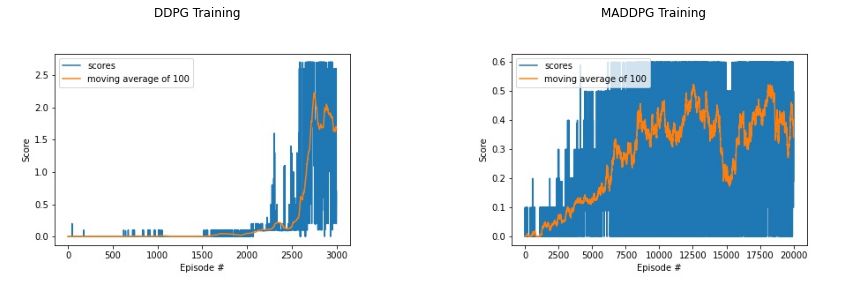

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as img
fig = plt.figure(figsize=(15, 15))
ddpg_plot = img.imread("plots/training_plot_ddpg.jpg")
maddpg_plot = img.imread("plots/training_plot_maddpg.jpg")
fig.add_subplot(1, 2, 1)
plt.imshow(ddpg_plot)
plt.axis('off')
plt.title("DDPG Training")

fig.add_subplot(1, 2, 2)
plt.imshow(maddpg_plot)
plt.axis('off')
plt.title("MADDPG Training")

plt.show()

The MADDPG training took much more iterations compared to the DDPG. We reached a score of 0.5230 in 12380 episodes. 

**NOTE: Even though MADDPG takes more time to train and also the score is lesser compared to DDPG, the test results are same for both. Both receive a score of 2.6 and never allow the ball to touch the ground.**

### Ideas for Future work

The model's performance can be improved if we use a deeper Neural network with more layers. Apart from this, the DDPG algorithm itself can be improved even more using techniques involving double learning like twin-delayed DDPG (TD3). 

We can further improve the performance of MADDPG algorithm by training agents with an ensemble of policies, an approach
believed to be generally applicable to any multi-agent algorithm.